#IMPORTANT: READ
- Put a big title above all the visualizations "TAMU Datathon By the Numbers"
- OR if you want to make the visualizations change based on user input, make it "TAMU Datathon - Where you fit in"
- If you want to make it interactive, change the number in bars[0].set_color('#00FF8C') to user_edu, user_maj etc
- Pass in a value from the sliders in Streamlit, that value goes into user_edu, user_maj
- That value should correspond to the right age group, education level, major category etc

- Make the format like this
- BIG TEXT (find the text in the printed items at the top of each block)
- Graph
- BIG TEXT
- Graph
- ...
- ...

- If you're making it interactive, for the major categories, take the user's major as a string, check which list it's in, find the number that makes that major category light up on the chart and then pass that number into the bars[0].set_color('#00FF8C') function

SUPER IMPORTANT: https://discuss.streamlit.io/t/libraries-that-are-currently-supported/57
This is how you override Streamlit's native plotting commands

Reading in the data

In [196]:
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt

applicants = pd.read_csv("applicants_cleans.csv")

plt.style.use('fivethirtyeight')

In [197]:
applicants.head()

,userid,age_bin,classification,first_generation,datascience_experience,num_hackathons_attended,workshop_suggestions,undergrad,Masters,PhD,...,Anthropology,Public Service and Administration,school_0,school_1,school_2,school_3,school_4,school_5,school_6,school_7
0,95030aef3e970680d882f1527f549d9e,4,5,0,2,0,Python Fundamentals (Functions/Loops)\nVisuali...,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,68ad76832a913de0d62df103b3d5b807,1,3,1,2,0,Training videos on different levels of machine...,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,959d8992667c8bfc1ac665f234360eb6,3,5,1,2,0,NaN,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,76b067cd5f3e1b1976d2e2eeceedf567,1,3,0,1,0,Python data science,1,0,0,...,0,0,0,0,0,0,0,0,1,1
4,f44cfb96520a82e172ce2ae116b21187,3,4,0,1,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Cleaning the data a little bit more

In [198]:
del applicants['userid']
applicants.head()

,age_bin,classification,first_generation,datascience_experience,num_hackathons_attended,workshop_suggestions,undergrad,Masters,PhD,Excel,...,Anthropology,Public Service and Administration,school_0,school_1,school_2,school_3,school_4,school_5,school_6,school_7
0,4,5,0,2,0,Python Fundamentals (Functions/Loops)\nVisuali...,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,3,1,2,0,Training videos on different levels of machine...,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,5,1,2,0,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,3,0,1,0,Python data science,1,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,3,4,0,1,0,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Bar chart of age groups

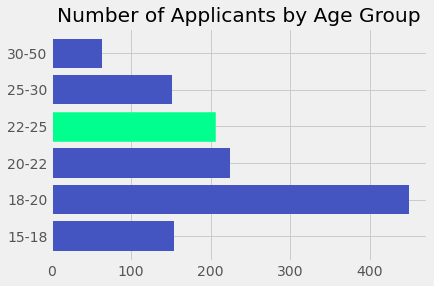

In [211]:
print('Most applicants are between the ages of 18 and 20')

age_counts = applicants['age_bin'].value_counts().to_dict()

#re-ordering dictionary by keys, so that youngest age group goes on bottom, oldest on top
age_counts = collections.OrderedDict(sorted(age_counts.items()))

keys = list(age_counts.keys())
values = list(age_counts.values())


for n, i in enumerate(keys):
    if i == 0:
        keys[n] = "15-18"
        
for n, i in enumerate(keys):
    if i == 1:
        keys[n] = "18-20"
        
for n, i in enumerate(keys):
    if i == 2:
        keys[n] = "20-22"
        
for n, i in enumerate(keys):
    if i == 3:
        keys[n] = "22-25"
        
for n, i in enumerate(keys):
    if i == 4:
        keys[n] = "25-30"
        
for n, i in enumerate(keys):
    if i == 5:
        keys[n] = "30-50"
        
#this represents input on the user's data        
user_age = 3
        
    
bars = plt.barh(keys, values, align='center', color = '#4455C2')

bars[user_age].set_color('#00FF8C')

bars = plt.title('Number of Applicants by Age Group', color = 'black')

Pie chart of education levels

Undergrads made up the overwhelming majority of applicants


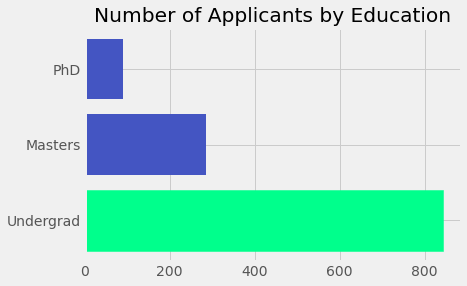

In [218]:
print("Undergrads made up the overwhelming majority of applicants")

edu_df = applicants[['undergrad','Masters','PhD']]

edu_categories = ['Undergrad', 'Masters', 'PhD']
edu_sums = []

columns = list(edu_df)

for column in columns:
    total = edu_df[column].sum()
    edu_sums.append(total)
    
    
#this represents input on the user's data
# 0 = undergrad, 1 = masters, 2 = phd
user_edu = 2

bars = plt.barh(edu_categories, edu_sums, align='center', color = '#4455C2')

bars[0].set_color('#00FF8C')

bars = plt.title('Number of Applicants by Education', color = 'black')

Bar chart of skills

Python is by far the most widely known skill, with 


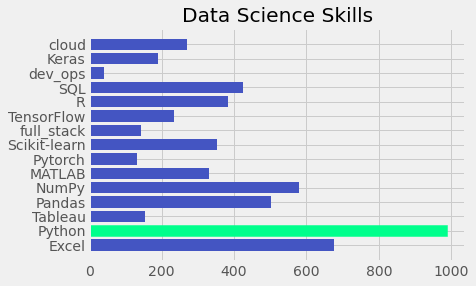

In [216]:
print("Python is by far the most widely known skill, with ")

skills_df = applicants[['Excel','Python','Tableau','Pandas',
                        'NumPy','MATLAB','Pytorch',
                        'Scikit-learn','full_stack','TensorFlow',
                        'R','SQL','dev_ops','Keras','cloud']]

columns = list(skills_df)
skills_sums = []

for column in columns:
    total = skills_df[column].sum()
    skills_sums.append(total)

bars = plt.barh(columns, skills_sums, align='center', color='#4455C2')

bars[1].set_color('#00FF8C')

bars = plt.title('Data Science Skills', color = 'black')

Bar chart of majors

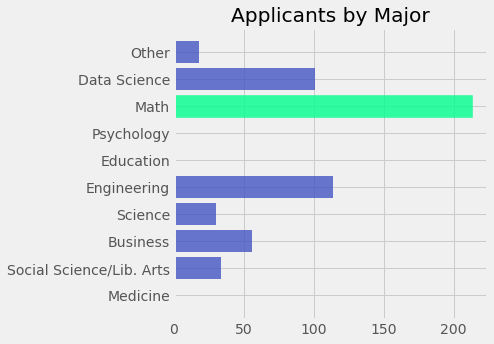

In [220]:
print('The number of math and statistics majors towered over the rest of the majors')


Medicine_Public_Health = ['Public Health','Molecular & Cellular Medicine']

Social_Sciences_Liberal_Arts = ['Sociology', 'English','International Studies', 'Political Science',
                              'International Affairs', 'Economics']

Business = ['Marketing','Accounting', 'Agricultural Economics','Business', 'Finance']

Science = ['Genetics', 'Oceanography','Entomology', 'Soil and Crop Sciences',
          'Geoscience', 'Geography', 'Neuroscience', 'Biochemistry and Biophysics',
           'Geology', 'Ecosystem Science and Management', 'Atmospheric Sciences',
           'Physics', 'Astronomy', 'Biology', 'Chemistry', 'Biomedical Sciences', 'Material Science',
           'Plant Pathology and Microbiology']

Engineering = ['Biological and Agricultural Engineering', 'Engineering Technology & Industrial Distribution',
              'Architecture', 'Construction Science', 'Civil Engineering', 'Electronic Systems Engineering',
               'Petroleum Engineering', 'Chemical Engineering', 'Ocean Engineering','Nuclear Engineering',
               'Aerospace Engineering', 'Mechanical Engineering','Computer Science & Engineering',
               'Biomedical Engineering','Industrial and/or Systems Engineering', 'Electrical Engineering']

Education = ['Educational Administration & Human Resource Development']

Psychology = ['Educational Psychology', 'Psychology']

Math = ['Mathematics','Applied Mathematics','Statistics']

Data_Science = ['Information Science','Information and Operations Management','Analytics',
                'Data Science & Analytics','Management Information Systems']

Other = ['Other', 'Agronomy', 'Landscape Architecture & Urban Planning','Visualization']


major_categories = [Medicine_Public_Health, Social_Sciences_Liberal_Arts, Business,
                   Science, Engineering, Education, Psychology, Math, Data_Science, Other]

subset_totals = []
for category in major_categories:
    subset_total = 0
    subset = applicants[category]
    subset_columns = list(subset)
    for column in subset_columns:
        column_total = subset[column].sum()
        subset_total += column_total
    subset_totals.append(subset_total)
        
total_applicants = sum(subset_totals)

labels = ['Medicine', 'Social Science/Lib. Arts', 'Business', 'Science',
         'Engineering', 'Education', 'Psychology', 'Math', 'Data Science', 'Other']

#this represents input on the user's data
user_maj = 2

bars = plt.barh(labels, subset_totals, align='center', color='#4455C2', alpha=0.8)

bars[7].set_color('#00FF8C')


bar = plt.title('Applicants by Major', color='black')
